# Sieci Neuronowie i Uczenie Maszynowe

Lab: Wprowadzenie do biblioteki PyTorch

---

**Autor materiałów:** Marek Wydmuch, Jakub Bednarek<br>

---

## Uwaga

* **Aby wykonać polecenia należy najpierw przejść do trybu 'playground'. File -> Open in Playground Mode**
* Nowe funkcje Colab pozwalają na autouzupełnianie oraz czytanie dokumentacji.


## Dlaczego Colab

* Obliczenia wykonywane przez sieci są wymagające obliczeniowo, a ich specyfika sprawia, że można je dużo szybciej wykonywać na GPU.
* Nie każdy ma odpowiedni GPU w swoim komputerze (rekomendowane GPU to GPU firmy Nvidia, alternatywnie układy Apple Silicon).
* Dlatego sugerowany sposób pracy będzie przez Colab na którym jest skonfigurowane środowisko wraz ze skromnym GPU.

## Cel ćwiczeń

* wprowadzenie biblioteki PyTorch,
* ukazanie różnic i podobieństw pomiędzy NumPy a PyTorch,
* algorytm wstecznej propagacji błędu w PyTorch.

## PyTroch

PyTorch to potężna biblioteka do uczenia maszynowego i głębokiego uczenia, stworzona przez Meta (dawniej Facebook).
U podstaw jest to biblioteka implementująca operacje na tensorach (tablicach) na wzór NumPy, którego poszczególne elementy zostały zaprezentowane na poprzednich zajęciach.
PyTorch oferuje dynamiczne podejście do tworzenia sieci neuronowych, co sprawia, że jest szczególnie popularny w środowisku badawczym i akademickim.

Główne cechy PyTorch:

- Imperatywny styl programowania, który jest bardziej naturalny dla programistów Pythona
- Dynamiczne grafy obliczeniowe (define-by-run), które ułatwiają debugowanie
Natywna integracja z Python i łatwa współpraca z bibliotekami jak NumPy
- Wsparcie dla CPU i GPU, z automatycznym przełączaniem między nimi
- Rozbudowany ekosystem narzędzi i bibliotek (torchvision, torchaudio, torchtext)

Aby rozpocząć pracę z PyTorch w Colab, wystarczy zaimportować bibliotekę:

In [40]:
import torch
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")

PyTorch version: 2.5.1+cu121
CUDA available: True


Jeśli nie korzystasz z Colab odwiedź https://pytorch.org/get-started/locally/ by dowiedzieć się jak zainstalować odpowiednią wersję dla swojego środowiska.

## Używanie biblioteki PyTorch

PyTorch domyślnie używa tensorów (tablic) z API bardzo podobnym do NumPy, poznanego na poprzednich zajęciach.

Poniżej przedstawione zostało porównanie wykonania tego samego zadania w NumPy oraz w PyTorch:

In [41]:
# Import biblioteki numpy
import numpy as np

# NumPy
print("NumPy:")
x_np = np.array([[1., 2.], [3., 4.]])
y_np = np.array([[5., 6.], [7., 8.]])
z_np = np.multiply(x_np, y_np)
print(f"x:\n{x_np}")
print(f"y:\n{y_np}")
print(f"x * y:\n{z_np}")

# PyTorch
print("\nPyTorch:")
x_torch = torch.tensor([[1., 2.], [3., 4.]])
y_torch = torch.tensor([[5., 6.], [7., 8.]])
z_torch = torch.mul(x_torch, y_torch)  # lub po prostu x_torch * y_torch
print(f"x:\n{x_torch}")
print(f"y:\n{y_torch}")
print(f"x * y:\n{z_torch}")

NumPy:
x:
[[1. 2.]
 [3. 4.]]
y:
[[5. 6.]
 [7. 8.]]
x * y:
[[ 5. 12.]
 [21. 32.]]

PyTorch:
x:
tensor([[1., 2.],
        [3., 4.]])
y:
tensor([[5., 6.],
        [7., 8.]])
x * y:
tensor([[ 5., 12.],
        [21., 32.]])


W obu przypadkach uzyskamy identyczny wynik, ale PyTorch oferuje dodatkowo:

- Automatyczne obliczanie gradientów (autograd)
- Łatwe przenoszenie obliczeń na GPU
- Zachowanie informacji o grafie obliczeniowym
- Pełną integrację z debuggerem Pythona

Inne przykłady składni bardzo podobnej do NumPy:

In [42]:
# Operacje są prawie identyczne jak w NumPy
print(x_np + y_np)
print(x_torch + y_torch)  # dodawanie

print(x_np * y_np)
print(x_torch * y_torch)  # mnożenie element-wise

print(x_np @ y_np)
print(x_torch @ y_torch)  # mnożenie macierzowe

print(np.mean(x_np))
print(torch.mean(x_torch))  # średnia

print(np.sum(x_np, axis=0))
print(torch.sum(x_torch, dim=0))  # suma wzdłuż wymiaru

[[ 6.  8.]
 [10. 12.]]
tensor([[ 6.,  8.],
        [10., 12.]])
[[ 5. 12.]
 [21. 32.]]
tensor([[ 5., 12.],
        [21., 32.]])
[[19. 22.]
 [43. 50.]]
tensor([[19., 22.],
        [43., 50.]])
2.5
tensor(2.5000)
[4. 6.]
tensor([4., 6.])


In [43]:
# Również w przypadku alokowania tablic/tensorów

# Tablice zer
arr_np = np.zeros([5, 5])
arr_torch = torch.zeros(5, 5)

# Tablice jedynek
arr_np = np.ones([5, 5])
arr_torch = torch.ones(5, 5)

# Tablice ze zdefiniowanymi wartościami
arr_np = np.array([1, 2, 3, 4, 5])
arr_torch = torch.tensor([1, 2, 3, 4, 5])

# Tablice z losowymi wartościami z rozkładu normalnego
arr_np = np.random.normal(0, 1, [5, 5])
arr_torch = torch.randn(5, 5)  # standardowy rozkład normalny (mean=0, std=1)
# Alternatywnie, z konkretną średnią i odchyleniem:
arr_torch = torch.normal(mean=0, std=1, size=(5, 5))

print('NumPy array:\n', arr_np, '\n')
print('PyTorch array:\n', arr_torch, '\n')

NumPy array:
 [[-0.29066847 -0.16280451  0.68065457 -0.48933356  1.57482691]
 [ 2.36300486  1.38612462  1.50778384 -1.03034428 -0.7423401 ]
 [-1.63618639 -0.40937183 -0.32773268  1.68756299  0.72433212]
 [-0.66860873  0.74258376  0.07254494 -1.1971826   0.05779536]
 [-1.22350295  1.54289218  2.22474608  0.7383668   1.82391724]] 

PyTorch array:
 tensor([[ 0.9654,  1.1220,  0.1264, -1.4422, -0.9690],
        [-0.0479, -0.0110, -0.9524,  0.0501, -0.6535],
        [ 0.1648,  1.0247,  0.9650,  0.1560,  0.4540],
        [ 1.8695, -0.4602, -0.7538,  0.2899, -0.1050],
        [-0.1656, -0.1729, -0.4178,  0.6995, -0.5259]]) 



Warto zauważyć kilka różnic między NumPy a PyTorch:

- W PyTorch często pomijamy "nawiasy" przy definiowaniu wymiarów - używamy po prostu `torch.zeros(5, 5)` zamiast `torch.zeros([5, 5])` lub `torch.zeros((5, 5))`. Czyli kolejne wymiary są przekazywane jako kolejne argumenty a nie obiekt o typie sekwencji.
- Zamiast array używamy tensor do tworzenia tensorów ze zdefiniowanymi wartościami.
Dla rozkładu normalnego PyTorch oferuje zarówno `torch.randn()` (dla standardowego rozkładu normalnego) jak i bardziej ogólną funkcję `torch.normal()`.
- Operacje po konkretnych wymiarach używają argumentu `dim` zamiast `axis`.

Wszystkie te tensory mogą być łatwo przeniesione na GPU poprzez dodanie metody `.cuda()` lub `.to('cuda')`, na przykład:


In [44]:
if torch.cuda.is_available():
    arr_torch = arr_torch.cuda()
arr_torch

tensor([[ 0.9654,  1.1220,  0.1264, -1.4422, -0.9690],
        [-0.0479, -0.0110, -0.9524,  0.0501, -0.6535],
        [ 0.1648,  1.0247,  0.9650,  0.1560,  0.4540],
        [ 1.8695, -0.4602, -0.7538,  0.2899, -0.1050],
        [-0.1656, -0.1729, -0.4178,  0.6995, -0.5259]], device='cuda:0')

Od teraz wszystkie operacje wykonywane na tym tensorze będą się automatycznie działy na GPU.

**Ważne:** Jeśli dwa obiekty wchodzą ze sobą w interakcję muszą znajdować się na tym samym urządzeniu (albo oba na GPU, albo oba na CPU).

### Zadanie 1

Zaalokuj tablicę samych zer o wymiarze 2 x 2. Następnie utwórz tablicę jedynek o tym samym wymiarze (wykorzystaj funkcję ones_like).

In [45]:
# alokacja zer
z = torch.zeros(2,2)

# alokacja jedynek
o = torch.ones_like(z)

print(z)
print(o)

tensor([[0., 0.],
        [0., 0.]])
tensor([[1., 1.],
        [1., 1.]])


### Zmienne "uczone" i autograd w PyTorch

Drugim filarem biblioteki PyTorch, po operacjach na tensorach, jest autograd.
Autograd to kluczowa funkcjonalność, która umożliwia automatyczne obliczanie gradientów. Jest to fundamentalny mechanizm używany w uczeniu głębokich sieci neuronowych.

W PyTorch możemy oznaczać tensory, które mają brać udział w liczeniu gradientów poprzez `requires_grad=True`.

In [46]:
x = torch.tensor(2.0, requires_grad=True)  # włączamy śledzenie gradientu
#x = torch.tensor(2.0)  # to spowoduje błąd poniższego kodu
print(f"x = {x}")
print(f"Czy x wymaga gradientu? {x.requires_grad}")

# Wykonujemy operacje matematyczne
y = x * 2  # y = 2x
z = y * y  # z = 4x²

print(f"\ny = {y}")
print(f"z = {z}")

# Obliczamy gradient dz/dx
z.backward()

# Sprawdzamy gradient (powinien być 16, bo dz/dx = 8x dla x=2)
print(f"\nGradient dz/dx = {x.grad}")

x = 2.0
Czy x wymaga gradientu? True

y = 4.0
z = 16.0

Gradient dz/dx = 16.0


In [47]:
# Alternatywną metodą zdefiniowana zmiennej wymagającej liczenia gradientu
# jest użycie klasy wrappującej parametr sieci neuronowej
import torch.nn as nn

x = nn.Parameter(torch.tensor(2.0))
print(f"x = {x}")
print(f"Czy x wymaga gradientu? {x.requires_grad}")

# Wykonujemy operacje matematyczne
y = x * 2  # y = 2x
z = y * y  # z = 4x²

print(f"\ny = {y}")
print(f"z = {z}")

# Obliczamy gradient dz/dx
z.backward()

# Sprawdzamy gradient (powinien być 16, bo dz/dx = 8x dla x=2)
print(f"\nGradient dz/dx = {x.grad}")

x = Parameter containing:
tensor(2., requires_grad=True)
Czy x wymaga gradientu? True

y = 4.0
z = 16.0

Gradient dz/dx = 16.0


Aby potem wyzerować gradient ale nie usuwać samej zmiennej możemy ustawić go na `None`.

In [48]:
x.grad = None

### Funkcje aktywacji i straty w PyTorch

PyTorch jest biblioteką przygotowaną do **Machine Learningu**. Wiele operacji bardzo często się powtarza w wielu zagadnieniach, np. funkcje aktywacji, funkcje straty, metryki, rodzaje warstw (operacji), itp. Stąd, w bilbiotece tej możemy znaleźć już gotowe komponenty, które można z łatwością wykorzystać (więcej o tym na kolejnych zajęciach).

Poniżej zaprezentowane zostały gotowe funkcje aktywacji oraz straty.

In [49]:
import torch
import torch.nn as nn
import torch.nn.functional as F  # funkcje aktywacji i inne operacje

# 1. Funkcje aktywacji
# Możemy używać ich na dwa sposoby:
# a) Jako warstwy (zalecane w modelach, o warstwach więcej na kolejnych zajęciach):
activation_layers = {
    'ReLU': nn.ReLU(),
    'LeakyReLU': nn.LeakyReLU(negative_slope=0.1),
    'Sigmoid': nn.Sigmoid(),
    'Tanh': nn.Tanh(),
    'ELU': nn.ELU(alpha=1.0),
    'SELU': nn.SELU(),
    'Softmax': nn.Softmax(dim=1),
    'LogSoftmax': nn.LogSoftmax(dim=1)
}

# b) Jako funkcje (przydatne w obliczeniach doraźnych):
x = torch.randn(2, 3)
print("Dane wejściowe:")
print(x)

print("\nRóżne funkcje aktywacji:")
print("ReLU:", F.relu(x))
print("Sigmoid:", torch.sigmoid(x))
print("Tanh:", torch.tanh(x))
print("Softmax:", F.softmax(x, dim=1))

# 2. Funkcje straty (loss functions)
loss_functions = {
    'MSE': nn.MSELoss(),  # Mean Squared Error - regresja
    'BCE': nn.BCELoss(),  # Binary Cross Entropy - klasyfikacja binarna
    'CrossEntropy': nn.CrossEntropyLoss(),  # klasyfikacja wieloklasowa
    'L1': nn.L1Loss(),  # Mean Absolute Error
    'Huber': nn.HuberLoss(),  # połączenie MSE i L1
    'KLDiv': nn.KLDivLoss(),  # Kullback-Leibler Divergence
}

# Przykład użycia funkcji straty:
# Regresja
x = torch.randn(3, 1)  # predykcje
y = torch.randn(3, 1)  # wartości rzeczywiste
mse_loss = nn.MSELoss()(x, y)
print(f"\nMSE Loss: {mse_loss.item()}")

# Klasyfikacja
predictions = torch.randn(3, 5)  # logity dla 5 klas
targets = torch.tensor([1, 0, 4])  # prawidłowe klasy
ce_loss = nn.CrossEntropyLoss()(predictions, targets)
print(f"Cross Entropy Loss: {ce_loss.item()}")

Dane wejściowe:
tensor([[ 0.3964, -0.8726,  2.1100],
        [ 1.0213, -0.6029,  1.1341]])

Różne funkcje aktywacji:
ReLU: tensor([[0.3964, 0.0000, 2.1100],
        [1.0213, 0.0000, 1.1341]])
Sigmoid: tensor([[0.5978, 0.2947, 0.8919],
        [0.7352, 0.3537, 0.7566]])
Tanh: tensor([[ 0.3768, -0.7027,  0.9710],
        [ 0.7704, -0.5391,  0.8124]])
Softmax: tensor([[0.1464, 0.0412, 0.8124],
        [0.4317, 0.0851, 0.4832]])

MSE Loss: 1.0166300535202026
Cross Entropy Loss: 1.1778539419174194


## Kompilacja grafów obliczeniowych

W PyTorch również istnieje możliwość optymalizacji kodu poprzez kompilację grafów obliczeniowych, używając torch.jit (znanego jako TorchScript) oraz torch.compile() (wprowadzonego w PyTorch 2.0). Zaletą ich używania jest to, że pozwalają one używać podzbioru normalnego Pythona.

In [50]:
import torch
import time

# 1. Używając TorchScript (@torch.jit.script)
@torch.jit.script
def scripted_fn(x, y):
    for i in range(100):
        x = x + y
    return x

# 2. Używając torch.compile (PyTorch 2.0+)
@torch.compile
def compiled_fn(x, y):
    for i in range(100):
        x = x + y
    return x

# 3. Zwykła funkcja Pythona dla porównania
def regular_fn(x, y):
    for i in range(100):
        x = x + y
    return x

# Przygotowanie danych
x = torch.randn(1000, 1000)
y = torch.randn(1000, 1000)

# Porównanie wydajności
def benchmark(fn, name, x, y, warmup=1, runs=5):
    # Warmup
    for _ in range(warmup):
        _ = fn(x, y)

    # Pomiar czasu
    start = time.time()
    for _ in range(runs):
        _ = fn(x, y)
    end = time.time()

    print(f"{name}: {(end-start)/runs:.4f} sekund na iterację")

# Uruchamiamy benchmark
print("Porównanie wydajności:")
benchmark(regular_fn, "Zwykła funkcja", x, y)
benchmark(scripted_fn, "TorchScript", x, y)
benchmark(compiled_fn, "Torch Compile", x, y)

Porównanie wydajności:
Zwykła funkcja: 0.0714 sekund na iterację
TorchScript: 0.0623 sekund na iterację
Torch Compile: 0.0065 sekund na iterację


### Ważne uwagi:

TorchScript (`@torch.jit.script`):

- Kompiluje (szybko) kod Python do pośredniej reprezentacji
- Pozwala na eksport modelu do formatu niezależnego od Pythona
- Ma pewne ograniczenia składniowe i typowanie
- Dobry do produkcyjnego wdrażania modeli


Torch Compile (`@torch.compile`):

- Nowsza metoda wprowadzona w PyTorch 2.0
- Często daje lepszą optymalizację
- Łatwiejsza w użyciu niż TorchScript
- Zachowuje więcej funkcjonalności Pythona
- Wymaga dłuższej kompilacji przy pierwszym uruchomienu funkcji.

Generalnie od wersji 2.0 zaleca się używanie Torch Compile.
Zarówno TorchScript jak i Torch Compile utrudniają debugowanie.

## Algorytm wstecznej propagacji błędu

Do wyprowadzenia wzorów na aktualizację zmiennych w algorytmie niezbędna jest znajomość zagadnień **chain-rule** oraz **multivariable chain-rule**. Poza podstawową wiedzą z matematyki są to jedyne niezbędne zagadnienia.

### Chain-rule & Multivariable Chain-rule

Poniżej zostały zaprezentowane zagadnienia **chain-rule** oraz **multivariable chain-rule** w sposób intuicyjny (i graficzny). Poniższa notacja została zaczerpnięta z sieci neuronowych, aby skojarzyć związek z algorytmem **backpropagation**.

#### Chain-rule

Jest to reguła opierająca się na pochodnej funkcji złożonej. W graficzny sposób można to pokazać następująco:

![chain-rule](https://drive.google.com/uc?id=1S8pSUrrOzoisKr8d8YJaQHNLYgEq2dpk)

Gdzie $L$ to pewna funkcja dla której liczymy pochodną względem zmiennej $w$. Jak widać, $L$ zależy od $y$, który zależy od $z$ który dopiero zależy bezpośrednio od $w$. Zależności tworzą łańcuch, skąd pochodzi nazwa **chain-rule**.

#### Multivariable Chain-rule

W przypadku gdy "łańcuch" w pewnym momencie się rozgałęzia, dalej możemy korzystać z zasady **chain-rule**, jednak tym razem przybiera ona formę nieco inną (lecz dalej intuicyjną):

![multivariable-chain-rule](https://drive.google.com/uc?id=13WH6JXd_5rnTkyToKrBcCZDPdUXCqoT8)

W tym przypadku, pochodna funkcji $L$ po zmiennej $z$ wyrażona jest jako suma pochodnych funkcji złożonych odpowiednio $y_1$ oraz $y_2$. Nic nie stoi na przeszkodzie, żeby stosować tę regułę także w sytuacji większej liczby rozgałęzień niż dwa, po prostu zawsze się dodaje pochodne z osobnych "ścieżek".

<!-- \\ %ib: chyba nie jest to tak dobry przykład, jak myślałem...

##### **Przykład:**
Załóżmy, że mamy funkcję $f(x) = x\cdot ln(x)$. Możemy ją przedstawić jako $f(x) = g(x)\cdot h(x)$, gdzie $g(x)=x$ i $h(x)=ln(x)$. Korzystając z multivariable chain-rule możemy wyprowadzić:

$$\frac{\partial f(x)}{\partial x} = \frac{\partial g(x)h(x)}{\partial x} = \frac{\partial g(x)h(x)}{\partial g(x)} \frac{\partial g(x)}{\partial x} + \frac{\partial g(x)h(x)}{\partial h(x)} \frac{\partial h(x)}{\partial x} = h(x)\cdot 1 + g(x)\cdot \frac{1}{x} = ln(x) + 1$$

Zwróć uwagę, że wzór na pochodną iloczynu jest szczególnym przypadkiem multivariable chain-rule:
$$(g(x)h(x))' = g'(x)h(x) + g(x)h'(x) = 1\cdot ln(x) + x\cdot\frac{1}{x} = ln(x) + 1$$ -->

\\

### Backpropagation

Algorytm **wstecznej propagacji błędu** jest właściwie jedynie rozwinięciem **reguły delta**, która została przedstawiona na pierwszych zajęciach. Podobnie jak poprzednio, uczenie neuronów opisane jest w następujący sposób:

$$w_i' = w_i - \mu \frac{\partial L}{\partial w_i} $$

Jedyną różnicą jest sposób w jaki się wylicza gradient. Nawiązując do powyższych, krótkich wyjaśnień **chain-rule**, w podobny sposób należy traktować sieci neuronowe.

**Dla warstwy wyjściowej** gradient można przedstawić następująco:

$$\frac{\partial L}{\partial w_{ij}} = \frac{\partial L}{\partial y_j} \frac{\partial y_j}{\partial w_{ji}} = \frac{\partial L}{\partial y_j} \frac{\partial y_j}{\partial z_j}\frac{\partial z_j}{\partial w_{ji}}$$

Albo inaczej:

$$\frac{\partial L}{\partial w_{ij}} = \delta_j o_i$$

gdzie $w_{ji}$ oznacza wagę połączenia pomiędzy neuronem $j$ a $i$, $\delta_j = \frac{\partial L}{\partial y_j} \frac{\partial y_j}{\partial z_j}$ oraz $o_i$ to wyjście z neuronu $i$ (dla neuronów w pierwszej warstwie będą to wejścia do sieci, natomiast w kolejnych warstwach będą to wyjścia z neuronów poprzednich).

**Dla warstwy ukrytej** sprawa nieco bardziej się komplikuje. Weźmy jako przykład następującą prostą sieć z 2 warstwami i łącznie 3 neuronami:

![simplenet](https://drive.google.com/uc?id=1NXHjEWUX3gAbn8NnHh9eGWdQaSNDavKW)

Dla warstwy wyjściowej możemy skorzystać jedynie z **chain-rule** uzyskując następujące równanie:

$$\frac{\partial L}{\partial w^{2}_{i}} = \frac{\partial L}{\partial y^{2}_i} \frac{\partial y^{2}_i}{\partial z^{2}_i}\frac{\partial z^{2}_i}{\partial w^{2}_{i}} = \delta^2_i y^1_1$$

Przy obliczaniu gradientu dla warstwy ukrytej najpierw stosujemy  proste **chain-rule**:

$$\frac{\partial L}{\partial w^{1}_{1}} = \frac{\partial L}{\partial y^{1}_1} \frac{\partial y^{1}_1}{\partial z^{1}_1}\frac{\partial z^{1}_1}{\partial w^{1}_{1}}$$

W tym momencie można zauważyć, że jest możliwe zastosowanie **multivariable chain-rule** do wyrażenia $\frac{\partial L}{\partial y^{1}_1}$ (ponieważ $L$ nie zależy bezpośrednio od $y^{1}_1$, oraz występuje "rozgałęzienie" od $y$):

$$\frac{\partial L}{\partial y^{1}_1} = \frac{\partial L}{\partial y^{2}_1} \frac{\partial y^{2}_1}{\partial y^{1}_1} + \frac{\partial L}{\partial y^{2}_2} \frac{\partial y^{2}_2}{\partial y^{1}_1} = \frac{\partial L}{\partial y^{2}_1} \frac{\partial y^{2}_1}{\partial z^{2}_1}\frac{\partial z^{2}_1}{\partial y^{1}_1} + \frac{\partial L}{\partial y^{2}_2} \frac{\partial y^{2}_2}{\partial z^{2}_2} \frac{\partial z^{2}_2}{\partial y^{1}_1}$$

Tu można zauważyć, że $\frac{\partial z^{2}_2}{\partial y^{1}_1} = w^2_2$ oraz $\frac{\partial L}{\partial y^{2}_2} \frac{\partial y^{2}_2}{\partial z^{2}_2} = \delta^2_2$ (przy założeniu liniowej funkcji aktywacji), co daje nam końcowo:

$$\frac{\partial L}{\partial y^{1}_1} = \sum_i^2 \delta^2_i w^2_i$$

Podstawiając do wcześniejszego wzoru otrzymujemy:

$$\frac{\partial L}{\partial w^{1}_{1}} = \sum_i^2 \delta^2_i w^2_i \frac{\partial y^{1}_1}{\partial z^{1}_1}\frac{\partial z^{1}_1}{\partial w^{1}_{1}}$$

Ostatecznie, za pomocą następujących podstawień możemy sprowadzić powyższe równanie do wersji spójnej z gradientem dla warstwy wyjściowej:

$$\sum_i^2 \delta^2_i w^2_i \frac{\partial y^{1}_1}{\partial z^{1}_1} = \delta^1_1$$
$$\frac{\partial z^{1}_1}{\partial w^{1}_{1}} = x$$
$$\frac{\partial L}{\partial w^{1}_{1}} = \delta^1_1 x$$



---

Podsumowując, zarówno dla warstwy wyjściowej jak i warstwy ukrytej gradienty możemy przedstawić w tej samej formie, składającej się z **błędu neuronu** ($\delta$), oraz wyjścia z poprzedniej warstwy ($y$ lub $x$).

$$\frac{\partial L}{\partial w^{i}_{j}} = \delta^i_j o^{(i-1)}$$

### Automatyczna wsteczna propagacja błędu

Można rozpatrywać różne algorytmy optymalizacji działające na bazie algorytmu wstecznej propagacji błędu, który sam w sobie jest po prostu pewną strategią przydziału informacji o błędzie do zmiennych, a to jak na tej podstawie będziemy je modyfikować pozostaje otwartą kwestią. Jednym z prostszych optymalizatorów jest **Stochastic Gradient Descent** (SGD). Różni się od klasycznego Gradient Descent tym, że w jego przypadku gradient liczony jest w każdej iteracji dla losowo wybranego podzbioru danych uczących zamiast dla wszystkich. Innym popularnym optymalizatorem jest **ADAM** (od "adaptive moment estimation"), który każdą zmienną modyfikuje na podstawie jej statystycznych momentów (rzędu 1 i 2) gradientu w pewnym oknie czasowym. Ogólnie konstruowanie optymalizatorów opartych na gradiencie to cała osobna obszerna dziedzina naukowa. Przykładowo, na niektórych problemach ADAM ma znacznie szybszą zbieżność niż SGD, ale na innych zauważalnie gorzej radzi sobie z uogólnieniem wiedzy i w efekcie błąd na zbiorze testowym jest większy.

Poniżej zaprezentowany został algorytm wstecznej propagacji błędu zaimplementowany w bibliotece PyTroch. Przykład składa się z definicji sieci neuronowej, funkcji straty oraz jednego kroku uczenia przy użyciu gotowego optymalizatora.

### Prosta sieć neuronowa

In [51]:
import torch

# zmienne uczone pojedynczego neuronu, który na wejście otrzymuje wektor 10 liczb
w = torch.nn.Parameter(torch.ones(10, 1))  # analogiczne do tf.Variable(tf.ones([10, 1]))
b = torch.nn.Parameter(torch.ones(1))      # analogiczne do tf.Variable(tf.ones([1]))

# definicja 1-warstwowej sieci neuronowej z funkcją aktywacji relu
# (@ jest również aliasem do torch.matmul() w PyTorch)
def network(x):
    return torch.relu(x @ w + b)  # analogiczne do tf.nn.relu(x @ w + b)

### Funkcja straty

W poniższym kodzie torch.mean to odpowiednik np.mean i działa tak samo. Jako drugi argument można podać wymiar, po którym liczona będzie średnia (domyślnie liczona jest z wszystkich wymiarów). Jeżeli chodzi o *reduce* (nazywane również *fold*) w nazwie, to jest to schemat obliczeń często wykorzystywany w paradygmacie programowania funkcyjnego, i polega na rekurencyjnym przechodzeniu przez strukturę przy jednoczesnym konstruowaniu nowej, w pewnym sensie redukując tę strukturę (np. macierz liczb) do nowej struktury (np. liczby).

In [52]:
# mean squared error jako funkcja straty
def loss_fn(y_pred, y_true):
   return torch.mean((y_pred - y_true) ** 2)

### Obliczenie gradientu

In [53]:
# wsteczna propagacja błędu obsługiwana jest przez optymalizatory dostępne w PyTorch
optimizer = torch.optim.Adam([w, b], lr=0.001)
#optimizer = torch.optim.SGD([w, b], lr=0.001)  # a tutaj Stochastic Gradient Descent

# wejście oraz pożądane wyjście z sieci neuronowej
x = torch.rand(32, 10)
y_true = torch.ones(32, 1)

# W PyTorch nie potrzebujemy GradientTape, gradienty są obliczane automatycznie
# Najpierw zerujemy gradienty z poprzedniej iteracji
optimizer.zero_grad()

# Forward pass
y_pred = network(x)
l = loss_fn(y_pred, y_true)

# Backward pass - obliczenie gradientów
l.backward()

# Aktualizacja parametrów przez optymalizator
optimizer.step()

# Wyświetlenie gradientów
print([w.grad, b.grad])  # gradienty są przechowywane w .grad

[tensor([[5.6755],
        [4.1640],
        [5.4748],
        [4.0915],
        [4.6046],
        [5.3440],
        [5.1754],
        [4.4948],
        [4.9095],
        [4.5843]]), tensor([9.7499])]


#### Zadanie 2

Korzystając z wiedzy z tych i poprzednich zajęć stwórz sieć neuronową składającą się z 3 warstw o rozmiarach odpowiednio 1, 2, 1. Niech w pierwszej i drugiej warstwie funkcją aktywacji będzie sigmoid a wyjście z sieci funkcją liniową. Skorzystaj z funkcji straty MSE.

Naucz sieć neuronową, aby wykonywała funkcję **sinus** (wejściem sieci niech będzie kąt wyrażony w radianach). Trening sieci powinien polegać na wykonaniu algorytmu wstecznej propagacji błędu **ITERS** razy. Każda iteracja niech przetwarza **batch** danych o rozmiarze 16. Do nauki sieci wykorzystaj algorytm **Stochastic Gradient Descent** (`torch.optim.SGD`).

W celu optymalizacji szybkości działania, dodaj do definicji modelu adnotację @torch.compile.

Przy domyślnych parametrach wyjdzie zasadniczo linia prosta na zerze. Poeksperymentuj z prędkością uczenia i liczbą iteracji, by poprawić ten rezultat. Sprawdź, jak działa ReLU dla tego problemu. Dla sigmoidalnej funkcji aktywacji rezultat powinien przypominać następujący wykres:
![alt text](https://www.cs.put.poznan.pl/ibladek/students/eio/img/expected_sine.png)


Iteracja 0, Loss: 1.5156
Iteracja 1000, Loss: 0.6081
Iteracja 2000, Loss: 0.1476
Iteracja 3000, Loss: 0.2224
Iteracja 4000, Loss: 0.1703
Iteracja 5000, Loss: 0.0756
Iteracja 6000, Loss: 0.0569
Iteracja 7000, Loss: 0.0412
Iteracja 8000, Loss: 0.1007
Iteracja 9000, Loss: 0.0498


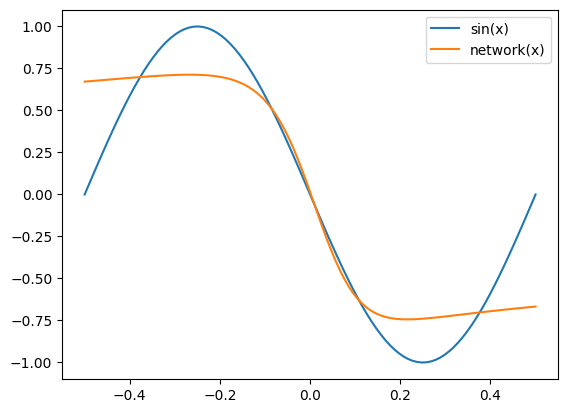

In [85]:
import math
import numpy as np
import matplotlib.pyplot as plt

ITERS = 100000  # ilość iteracji
LR = 0.1  # prędkość uczenia

# pierwsza warstwa
w1 = torch.nn.Parameter(torch.rand(1, 2))
b1 = torch.nn.Parameter(torch.rand(2))

# druga warstwa
w2 = torch.nn.Parameter(torch.rand(2, 2))
b2 = torch.nn.Parameter(torch.rand(2))

# trzecia warstwa
w3 = torch.nn.Parameter(torch.rand(2, 1))
b3 = torch.nn.Parameter(torch.rand(1))

def layer_1(x):
    return torch.sigmoid(x @ w1 + b1)

def layer_2(x):
    return torch.sigmoid(x @ w2 + b2)

def layer_3(x):
    return (x @ w3 + b3)

def network(x):  # obliczanie wyjścia sieci
    return layer_3(layer_2(layer_1(x)))

all_parameters = [w1, b1, w2, b2, w3, b3]
optimizer = torch.optim.SGD(all_parameters, lr=LR)

for i in range(ITERS):
    # dane wejściowe
    x = torch.rand(16, 1) * (2 * math.pi)
    y_true = torch.sin(x)  # dane uczące (ground truth)
    x = (x - math.pi) / (2 * math.pi) # przeskalowanie danych do [-1, 1]

    # zerowanie gradientów
    optimizer.zero_grad()

    # forward pass
    y = network(x)

    # obliczanie błędu
    loss = torch.mean((y-y_true)**2)

    # backward pass
    loss.backward()

    # aktualizacja wag
    optimizer.step()

    if i % 1000 == 0:
        print(f'Iteracja {i}, Loss: {loss.item():.4f}')

# testowanie sieci na zbiorze testowym
x = torch.linspace(0, 2 * math.pi, 100).reshape(-1, 1)
y_test = torch.sin(x)
x = (x - math.pi) / (2 * math.pi)
with torch.no_grad():  # wyłączamy obliczanie gradientów podczas testowania
    y_pred = network(x)

# konwersja do numpy dla matplotlib
x = x.numpy()
y_test = y_test.numpy()
y_pred = y_pred.numpy()

plt.plot(x, y_test, label='sin(x)')
plt.plot(x, y_pred, label='network(x)')
plt.legend()
plt.show()

#### Zadanie 3

Wykonaj ponownie zadanie 2, tym razem samodzielnie implementując algorytm backpropagation.

Iteracja 0, Loss: 3.0644
Iteracja 1000, Loss: 0.5680
Iteracja 2000, Loss: 0.0844
Iteracja 3000, Loss: 0.1275
Iteracja 4000, Loss: 0.1293
Iteracja 5000, Loss: 0.2145
Iteracja 6000, Loss: 0.1313
Iteracja 7000, Loss: 0.1560
Iteracja 8000, Loss: 0.1907
Iteracja 9000, Loss: 0.2022


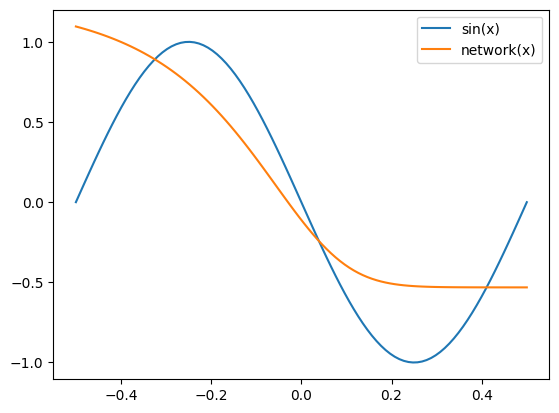

In [95]:
import math
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

ITERS = 10000  # ilość iteracji
LR = 0.01  # prędkość uczenia

# pierwsza warstwa
w1 = torch.rand(1, 2, requires_grad=True)
b1 = torch.rand(2, requires_grad=True)

# druga warstwa
w2 = torch.rand(2, 2, requires_grad=True)
b2 = torch.rand(2, requires_grad=True)

# trzecia warstwa
w3 = torch.rand(2, 1, requires_grad=True)
b3 = torch.rand(1, requires_grad=True)

def d_sigmoid(x):
    return torch.sigmoid(x) * (1-torch.sigmoid(x))

for i in range(ITERS):
    # dane wejściowe
    x = torch.rand(16, 1) * (2 * math.pi)
    y_true = torch.sin(x)  # dane uczące (ground truth)
    x = (x - math.pi) / (2 * math.pi)  # przeskaluj dane do [-1, 1]

    # forward pass
    a1 = torch.sigmoid(x @ w1 + b1)
    a2 = torch.sigmoid(a1 @ w2 + b2)
    y = (a2 @ w3 + b3)

    # obliczanie błędu
    loss = torch.mean((y - y_true) ** 2)

    # backward pass i aktualizacja wag
    delta3 = 2 * (y - y_true) * 1
    #print(delta3)
    w3 = w3 - LR * (a2.T @ delta3)
    b3 = b3 - LR * delta3.sum()

    #print(a2.T @ delta3)

    delta2 = delta3 @ w3.T * d_sigmoid(a2)
    w2 = w2 - LR * (a1.T @ delta2)
    b2 = b2 - LR * delta2.sum()

    delta1 = delta2 @ w2.T * d_sigmoid(a1)
    w1 = w1 - LR * (x.T @ delta1)
    b1 = b1 - LR * delta1.sum()

    if i % 1000 == 0:
        print(f'Iteracja {i}, Loss: {loss.item():.4f}')

# testowanie sieci na zbiorze testowym
x = torch.linspace(0, 2 * math.pi, 100).reshape(-1, 1)
y_test = torch.sin(x)
x = (x - math.pi) / (2 * math.pi)
with torch.no_grad():  # wyłączamy obliczanie gradientów podczas testowania
    a1 = torch.sigmoid(x @ w1 + b1)
    a2 = torch.sigmoid(a1 @ w2 + b2)
    y_pred = a2 @ w3 + b3

# konwersja do numpy dla matplotlib
x = x.numpy()
y_test = y_test.numpy()
y_pred = y_pred.numpy()

plt.plot(x, y_test, label='sin(x)')
plt.plot(x, y_pred, label='network(x)')
plt.legend()
plt.show()